**Fruit Box - Proyecto de Customer Analytics**

Se cuenta con una muestra de 100 transacciones.

Primero importamos los datos disponibles de las transacciones de los clientes.
Como las variables son categoricas, entonces las columnas tienen la siguiente codificación:

* tamaño_caja: S = 1; M = 2; L = 3
* frecuencia_compra: semanal = 1; quincenal = 2; mensual = 3; mayor a 1 mes = 4
* canal: Telefono o postal = 1; tienda online = 2; app = 3; redes sociales = 4
* antiguedad (en años): este valor está entre 1 y 4 años.

Se cuenta con una tabla de datos inicial de 100 filas x 6 columnas.

Con el método head() se muestran las primeras 5 filas de la tabla.

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


df = pd.read_excel('datos_Fbox.xlsx')
print('Cantidad de filas y columnas: ',df.shape)
df.head()

Cantidad de filas y columnas:  (100, 6)


,id_transaccion,edad,tamaño_caja,frec_compra,canal,antiguo
0,1,20,1,3,3,4
1,2,74,2,4,3,4
2,3,25,3,4,4,4
3,4,24,3,2,2,4
4,5,80,1,2,2,1


**1. Segmentación por rango de edades**

Como la variable 'edad' toma valores entre 18 y 90 años, vamos a agrupar dichos valores creando grupos de edades. Se crean 5 grupos.

Se observa que las personas mayores de 66 años son las más representativas en esta muestra.



In [14]:
edad = df.edad
bins = (0, 25, 40, 55, 65, np.Inf)  # The edges
labels = ('18-25', '26-40', '41-55', '56-65', '>66')
groups = pd.cut(edad, bins=bins, labels=labels).sort_values()

groups.value_counts()

>66      31
41-55    22
26-40    20
18-25    17
56-65    10
Name: edad, dtype: int64

Graficamos la cantidad de personas en cada grupo de edades:

Text(0.5, 1.0, 'Age groups')

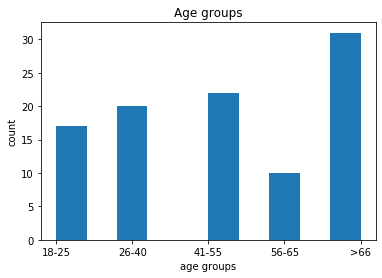

In [3]:
plt.hist(groups.sort_values())

# set x/y labels and plot title
plt.xlabel("age groups")
plt.ylabel("count")
plt.title("Age groups")

**2. Graficar grupos de Edad vs Tamaño de Caja**

Primero, se crea una nueva columna en la tabla que contenga el grupo de edad al que pertenece cada usuario. De esta forma, se reduce la cantidad de valores de edad para manipular, porque inicialmente la columna 'edad' toma valores desde 18 hasta 90, es decir 72 valores diferentes. Al agrupar en 5 grupos de edades, reducimos esos 72 valores a solamente 5.

Luego, respecto al tamaño de cajas, la cual es una variable categorica que toma 3 valores (S,M,L), debemos separar la columna inicial 'tamaño_caja' en 3 columnas aparte, con el fin de poder realizar el gráfico. Para esto se utiliza el metodo get_dummies(). 

In [19]:
cajas = pd.get_dummies(df["tamaño_caja"])

cajas.head()

# merge data frame "df" and "dummy_variable_1" 
df['grupo_edad'] = pd.cut(edad, bins=bins, labels=labels)
df1= pd.concat([df.grupo_edad, cajas], axis=1)
df1.rename(columns={1:'S', 2:'M',3:'L'}, inplace=True)
print(df1.head())


  grupo_edad  S  M  L
0      18-25  1  0  0
1        >66  0  1  0
2      18-25  0  0  1
3      18-25  0  0  1
4        >66  1  0  0


Generamos una tabla auxiliar que contiene los 5 grupos de edades y la cantidad de cajas tamaño S,M,L que ha comprado cada grupo.

In [25]:
%matplotlib inline 

df1 = df1.groupby(['grupo_edad'],as_index=False).sum()
df1['total_cajas'] = df1.S + df1.M + df1.L
df1

,grupo_edad,S,M,L,total_cajas
0,18-25,7,5,5,17
1,26-40,6,7,7,20
2,41-55,10,6,6,22
3,56-65,5,4,1,10
4,>66,11,10,10,31


Finalmente, generamos el grafico de barras que muestra cuantas cajas de cada tipo ha comprado cada grupo de edades.

1    39
2    32
3    29
Name: tamaño_caja, dtype: int64

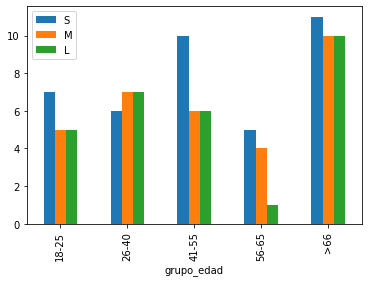

In [29]:
ax = df1.plot(x='grupo_edad', y = ['S','M','L'], kind='bar')
df.tamaño_caja.value_counts()


Se observa que el grupo de personas mayores a 66 años es el que mas compra cajas de frutas y su caja favorita es la tipo S.

Luego sigue el grupo 41-55 años, que prefiere tambien la caja tipo S. Finalmente, sigue el grupo 26-40 años, el cual no muestra diferencia significativa por el tamaño de cajas.

Tambien se observa que la caja mas vendida es la tipo S, seguida de M y luego L.

**3. Frecuencia de compra**

Recordemos que la frecuencia de compra está codificada así:

* semanal = 1
* quincenal = 2
* mensual = 3
* mayor a 1 mes = 4

3    36
2    23
4    22
1    19
Name: frec_compra, dtype: int64


Text(0.5, 1.0, 'Frecuencia de compra')

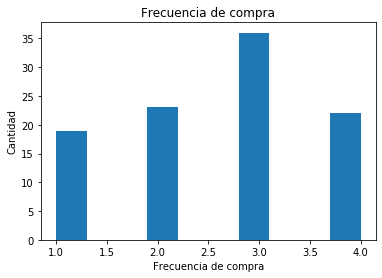

In [34]:
print(df.frec_compra.value_counts())

plt.hist(df.frec_compra)

# set x/y labels and plot title
plt.xlabel("Frecuencia de compra")
plt.ylabel("Cantidad")
plt.title("Frecuencia de compra")

Del grafico anterior se observa que las personas prefieren la compra mensual (código = 3); luego sigue la compra quincenal y mayor a un mes (código = 2 y 4); finalmente la compra semanal (codigo = 1).

Por lo tanto, se debe implementar una campaña de marketing para lograr compras más recurrentes, es decir, convertir la mayoria de compras a frecuencia semanal.

**3.1 Frecuencia de compra vs canal**

Primero se genera una tabla auxiliar que relacione el canal de venta y la frecuencia de las compras. También debe tener el total de ventas en cada canal.

Recordemos que el canal de venta está codificado así:

* 1 = Telefono o postal
* 2 = tienda online
* 3 = app
* 4 = redes sociales



In [44]:
f_compra = pd.get_dummies(df["frec_compra"])

# merge data frame "df" and "dummy_variable_1" 

df2= pd.concat([df.canal, f_compra], axis=1)

df2.rename(columns={1:'semanal', 2:'quincenal',3:'mensual',4:'mayor_1_mes'}, inplace=True)

df2['total_ventas_canal'] = df2['semanal'] + df2['quincenal'] + df2['mensual'] + df2['mayor_1_mes'] 
df2 = df2.groupby(['canal'],as_index=False).sum()
df2


,canal,semanal,quincenal,mensual,mayor_1_mes,total_ventas_canal
0,1,3,6,8,5,22
1,2,4,9,8,5,26
2,3,4,3,8,4,19
3,4,8,5,12,8,33


Con la tabla auxiliar generamos el grafico que relaciona el canal de ventas con la frecuencia de las compras.

Codificacion de canales de venta: 

1 = telefono o correo postal
2 = tienda online
3 = app movil
4 = redes sociales



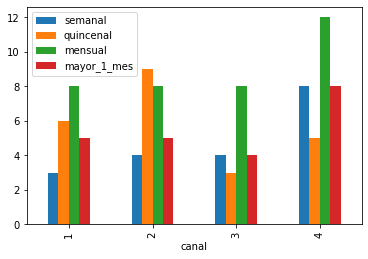

In [50]:
ax = df2.plot(x='canal', y = ['semanal','quincenal','mensual','mayor_1_mes'], kind='bar')

print('Codificacion de canales de venta: \n')
print('1 = telefono o correo postal')
print('2 = tienda online')
print('3 = app movil')
print('4 = redes sociales\n')


En el grafico y la tabla anterior se observa que el canal 4: redes sociales es el que mas ventas presenta, seguido por la tienda online, luego telefono y finalmente la app.

Esto muestra que se debe incentivar más la compra usando la app movil, y más en esta época de coronavirus. Sin embargo, al ser las redes sociales el mayor canal de venta, se observa que las campañas publicitarias por este medio están alcanzando al público objetivo. Como se mencionó antes, la mayor frecuencia de compras es mensual pero se debe trabajar para convertir esas compras en frecuencia semanal.

**4. Antigüedad vs Tamaño de caja**


4    30
3    29
1    23
2    18
Name: antiguo, dtype: int64


Text(0.5, 1.0, 'Antigüedad de clientes')

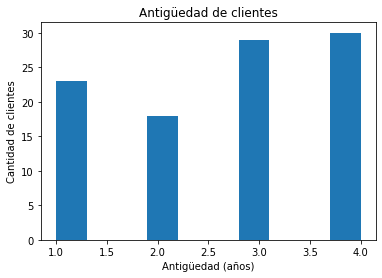

In [52]:
print(df.antiguo.value_counts())

plt.hist(df.antiguo)

# set x/y labels and plot title
plt.xlabel("Antigüedad (años)")
plt.ylabel("Cantidad de clientes")
plt.title("Antigüedad de clientes")

Del grafico anterior se observa que la mayoria de clientes tiene una antigüedad entre 3 y 4 años. Esto indica que puede existir cierta fidelizacion pero tambien muestra que se deben buscar nuevos clientes, ya que el conteo para clientes con antigüedad menor o igual a 1 año es del 23%.

Ahora procedemos a graficar la antigüedad de clientes versus el tamaño de cajas.

In [64]:
cajas = pd.get_dummies(df["tamaño_caja"])
df3= pd.concat([df.antiguo, cajas], axis=1)
df3.rename(columns={1:'S', 2:'M',3:'L'}, inplace=True)
df3 = df3.groupby(['antiguo'],as_index=False).sum()

total_cajas = df3.S.sum() + df3.M.sum() + df3.L.sum()
print('Total cajas: ',total_cajas)
df3

Total cajas:  100


,antiguo,S,M,L
0,1,7,8,8
1,2,7,6,5
2,3,12,9,8
3,4,13,9,8


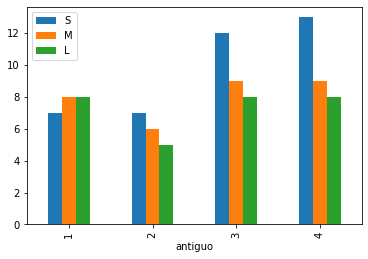

In [65]:
ax = df3.plot(x='antiguo', y = ['S','M','L'], kind='bar')

Se observa que los clientes entre 3 y 4 años de antigüedad prefieren la caja tamaño S. Por su parte, los clientes que llevan 1 año o menos, no tienen preferencia marcada por alguna de las cajas.

Se debe trabajar para continuar fidelizando a los clientes  existentes y para aumentar la cantidad de clientes nuevos.